In [1]:
from models.cartpole_mod import ActionModelCartPole
from MPPI.mppi import MPPI, MPPILogger
import numpy as np

In [2]:
# MODEL
DT = 0.02
SIM_STEP = 200
MASS_POLE = 0.01
MASS_CART = 1.0
LENGTH_POLE = 2.0
# SOLVER
HORIZON = 100
NUM_SAMPLES = 100
LAM = 10
SIGMA = np.array([10])


In [3]:

running_model = ActionModelCartPole(
    mass_cart=MASS_CART,
    mass_pole=MASS_POLE,
    length_pole=LENGTH_POLE,
    delta_t=DT,
    is_terminal=False
)

terminal_model = ActionModelCartPole(
    mass_cart=MASS_CART,
    mass_pole=MASS_POLE,
    length_pole=LENGTH_POLE,
    delta_t=DT,
    is_terminal=True
)

running_model.state_weights = np.array([5.0, 10.0, 0.1, 0.1])
terminal_model.state_weights = np.array([5.0, 10.0, 0.1, 0.1])


In [4]:
logger = MPPILogger(enable_logging=True, n_log=5)
mppi = MPPI(running_model, terminal_model, horizon=HORIZON,
            num_samples=NUM_SAMPLES, lambda_param=LAM,
            noise_sigma=SIGMA, logger=logger)
x0 = np.array([0.0, 0.0, 1.0, 0.5])
u_mppi_opt = mppi.solve(x0, SIM_STEP)

Iteration 1/200, Min Cost: 7513.3835, Mean Cost: 13613.3223
Iteration 2/200, Min Cost: 5669.2147, Mean Cost: 12992.6179
Iteration 3/200, Min Cost: 4884.7153, Mean Cost: 10412.0902
Iteration 4/200, Min Cost: 3955.4052, Mean Cost: 10833.1328
Iteration 5/200, Min Cost: 3678.8933, Mean Cost: 11173.0852
Iteration 6/200, Min Cost: 3568.6972, Mean Cost: 10127.3435
Iteration 7/200, Min Cost: 3161.3093, Mean Cost: 9490.1848
Iteration 8/200, Min Cost: 2724.0081, Mean Cost: 10043.1381
Iteration 9/200, Min Cost: 2465.9126, Mean Cost: 8057.8930
Iteration 10/200, Min Cost: 2221.3045, Mean Cost: 8884.4454
Iteration 11/200, Min Cost: 2186.3685, Mean Cost: 9407.9778
Iteration 12/200, Min Cost: 2050.0307, Mean Cost: 8543.9306
Iteration 13/200, Min Cost: 2021.6314, Mean Cost: 9050.6198
Iteration 14/200, Min Cost: 1968.2636, Mean Cost: 9383.8192
Iteration 15/200, Min Cost: 1927.6050, Mean Cost: 8448.1752
Iteration 16/200, Min Cost: 1822.4500, Mean Cost: 9509.6745
Iteration 17/200, Min Cost: 1846.9207, Mea

In [5]:
x_opt_mppi, mppi_final_cost = mppi.rollout_trajectory(x0, u_mppi_opt)


<Axes: title={'center': 'Cost Over Iterations'}, xlabel='Iteration', ylabel='Cost Value'>

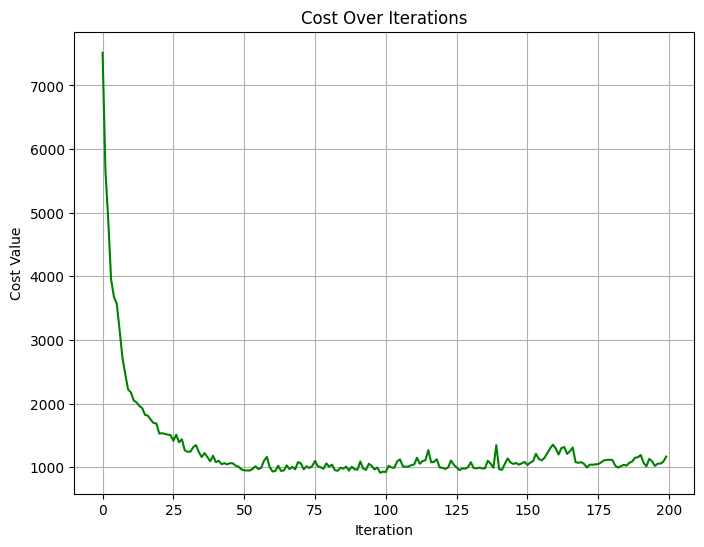

In [6]:
from utils.plotting import plot_control_sequence, plot_state_trajectory, plot_cost, plot_convergence
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

plot_cost(logger.total_cost_hist, ax=axs, color="green",  label="MPPI")

processing the animation ... 
... processing done


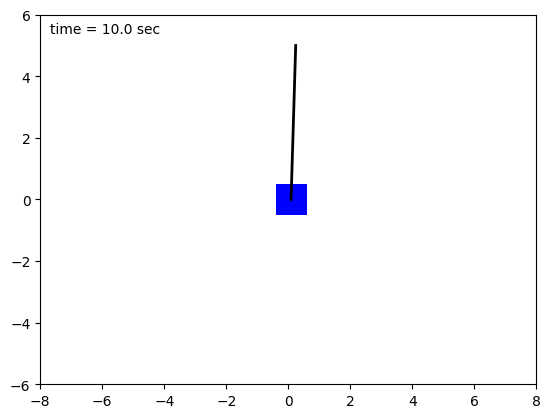

In [47]:
from utils.cartpole_utils import animateCartpole
from IPython.display import HTML

anim = animateCartpole(x_opt_mppi)
HTML(anim.to_jshtml())

processing the animation ... 
... processing done


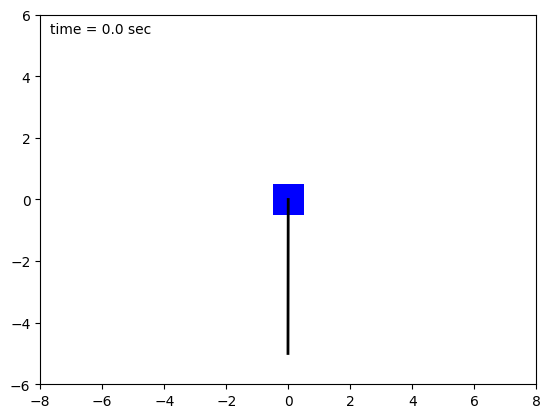

In [38]:
anim = animateCartpole([np.array([0.0, 3.14, 1.0, 0.5])])
HTML(anim.to_jshtml())